In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import joblib

# # Function to apply Gaussian filter
# def apply_gaussian_filter(image, kernel_size=5):
#     return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# # Function to load, resize and preprocess images
# def load_and_preprocess_image(image_path, scale_percent, filter_type=False, kernel_size=5):
#     image = cv2.imread(image_path)
#     new_width = int(image.shape[1] * scale_percent / 100)
#     new_height = int(image.shape[0] * scale_percent / 100)
#     resized_image = cv2.resize(image, (new_width, new_height))
    
#     if filter_type:
#         resized_image = apply_gaussian_filter(resized_image, kernel_size)
#         print("Filtered with Gaussian")
    
#     return resized_image

# # Function to draw grid lines on the image
# def draw_grid_lines(image, square_size, line_thickness=2, color=(0, 0, 255)):
#     img_height, img_width = image.shape[:2]
#     grid_image = image.copy()
    
#     # Draw horizontal lines
#     for y in range(0, img_height, square_size):
#         cv2.line(grid_image, (0, y), (img_width, y), color, line_thickness)
    
#     # Draw vertical lines
#     for x in range(0, img_width, square_size):
#         cv2.line(grid_image, (x, 0), (x, img_height), color, line_thickness)
    
#     return grid_image

# # Function to rotate an image
# def rotate_image(image, angle):
#     (h, w) = image.shape[:2]
#     center = (w // 2, h // 2)
#     M = cv2.getRotationMatrix2D(center, angle, 1.0)
#     rotated = cv2.warpAffine(image, M, (w, h))
#     return rotated

# # Load the original image with 100% scaling
# original_image_path = "../satellite-images/Miami.jpg"
# filter_true = True  # Apply Gaussian filter
# scale_percent = 100  # Use 100% scaling for full resolution
# kernel_size = 5  # Kernel size for Gaussian filter
# original_image_rescaled = load_and_preprocess_image(original_image_path, scale_percent, filter_true, kernel_size)

# # Load the water mask from the .pkl file
# water_mask_pkl_path = '../dilated_image_water_mask.pkl'
# water_mask_binary = joblib.load(water_mask_pkl_path)

# # Resize the water mask to match the original image dimensions
# water_mask_image_rescaled = cv2.resize(water_mask_binary, (original_image_rescaled.shape[1], original_image_rescaled.shape[0]), interpolation=cv2.INTER_NEAREST)

# # Verify dimensions
# print(f"Original image dimensions: {original_image_rescaled.shape}")
# print(f"Water mask dimensions: {water_mask_image_rescaled.shape}")

# # Define square size
# square_size = 150  # Example size, you can adjust it as needed

# # Draw grid lines on the original image and water mask for visual segmentation
# original_image_with_grid = draw_grid_lines(original_image_rescaled, square_size)
# water_mask_with_grid = draw_grid_lines(water_mask_image_rescaled, square_size)

# # Load the template image
# template_image_path = '../satellite-images/Miami_boat_template.jpg'  # Update with the actual path
# template_image = cv2.imread(template_image_path, 0)

# # Define angles to rotate the template
# angles = [0, 45, 90, 135, 180, 225, 270, 315]

# # Apply template matching and highlight matches
# overlay_image = original_image_rescaled.copy()
# for y in range(0, overlay_image.shape[0], square_size):
#     for x in range(0, overlay_image.shape[1], square_size):
#         water_segment = water_mask_image_rescaled[y:y+square_size, x:x+square_size]
#         if np.any(water_segment == 1):  # Check if the segment contains water
#             cv2.rectangle(original_image_with_grid, (x, y), (x + square_size, y + square_size), (0, 255, 0), 2)
#             segment = original_image_rescaled[y:y+square_size, x:x+square_size]
#             segment_gray = cv2.cvtColor(segment, cv2.COLOR_BGR2GRAY)
#             segment_h, segment_w = segment_gray.shape
#             #print(f"Segment size: ({segment_w}, {segment_h})")
#             for angle in angles:
#                 rotated_template = rotate_image(template_image, angle)
#                 template_h, template_w = rotated_template.shape
#                 #print(f"Template rotated by {angle} degrees size: ({template_w}, {template_h})")
#                 if template_w <= segment_w and template_h <= segment_h:
#                     #print(f"Template rotated by {angle} degrees is smaller than or equal to segment size.")
#                     res = cv2.matchTemplate(segment_gray, rotated_template, cv2.TM_CCOEFF_NORMED)
#                     threshold = 0.8  # Example threshold, adjust as needed
#                     loc = np.where(res >= threshold)
#                     for pt in zip(*loc[::-1]):
#                         cv2.rectangle(overlay_image[y:y+square_size, x:x+square_size], (pt[0], pt[1]), (pt[0] + template_w, pt[1] + template_h), (0, 0, 255), 2)
#                 else:
#                     if angle == 0:
#                         pass
#                         # print(f"ERROR: Template rotated by {angle} degrees is larger than segment size.")


# cv2.imwrite("../original_image_100p_150sq.png", original_image_with_grid)
# cv2.imwrite("../overlay_image_100p_150sq_template_method.png", overlay_image)

# # Display the images
# plt.figure(figsize=(20, 10))

# plt.subplot(1, 2, 1)
# plt.title('Original Image with Water Squares')
# plt.imshow(cv2.cvtColor(original_image_with_grid, cv2.COLOR_BGR2RGB))

# plt.subplot(1, 2, 2)
# plt.title('Detected Boats')
# plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))

# plt.show()

In [5]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import joblib

# # Function to apply Gaussian filter
# def apply_gaussian_filter(image, kernel_size=5):
#     return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# # Function to load, resize and preprocess images
# def load_and_preprocess_image(image_path, scale_percent, filter_type=False, kernel_size=5):
#     image = cv2.imread(image_path)
#     new_width = int(image.shape[1] * scale_percent / 100)
#     new_height = int(image.shape[0] * scale_percent / 100)
#     resized_image = cv2.resize(image, (new_width, new_height))
    
#     if filter_type:
#         resized_image = apply_gaussian_filter(resized_image, kernel_size)
#         print("Filtered with Gaussian")
    
#     return resized_image

# # Function to draw grid lines on the image
# def draw_grid_lines(image, square_size, line_thickness=2, color=(0, 0, 255)):
#     img_height, img_width = image.shape[:2]
#     grid_image = image.copy()
    
#     # Draw horizontal lines
#     for y in range(0, img_height, square_size):
#         cv2.line(grid_image, (0, y), (img_width, y), color, line_thickness)
    
#     # Draw vertical lines
#     for x in range(0, img_width, square_size):
#         cv2.line(grid_image, (x, 0), (x, img_height), color, line_thickness)
    
#     return grid_image

# # Function to rotate an image
# def rotate_image(image, angle):
#     (h, w) = image.shape[:2]
#     center = (w // 2, h // 2)
#     M = cv2.getRotationMatrix2D(center, angle, 1.0)
#     rotated = cv2.warpAffine(image, M, (w, h))
#     return rotated

# # Load the original image with 100% scaling
# original_image_path = "../satellite-images/Miami.jpg"
# filter_true = True  # Apply Gaussian filter
# scale_percent = 100  # Use 25% scaling for quicker processing
# kernel_size = 5  # Kernel size for Gaussian filter
# original_image_rescaled = load_and_preprocess_image(original_image_path, scale_percent, filter_true, kernel_size)

# # Load the water mask from the .pkl file
# water_mask_pkl_path = '../dilated_image_water_mask.pkl'
# water_mask_binary = joblib.load(water_mask_pkl_path)

# # Resize the water mask to match the original image dimensions
# water_mask_image_rescaled = cv2.resize(water_mask_binary, (original_image_rescaled.shape[1], original_image_rescaled.shape[0]), interpolation=cv2.INTER_NEAREST)

# # Verify dimensions
# print(f"Original image dimensions: {original_image_rescaled.shape}")
# print(f"Water mask dimensions: {water_mask_image_rescaled.shape}")

# # Define square size
# square_size = 150  # Example size, you can adjust it as needed

# # Draw grid lines on the original image and water mask for visual segmentation
# original_image_with_grid = draw_grid_lines(original_image_rescaled, square_size)
# water_mask_with_grid = draw_grid_lines(water_mask_image_rescaled, square_size)


# template_image_paths = [
#     '../satellite-images/Miami_boat_template1.jpg',
#     '../satellite-images/Miami_boat_template2.jpg',
#     '../satellite-images/Miami_boat_template3.jpg',
#     '../satellite-images/Miami_boat_template4.jpg'
# ]


# # template_image_paths = [
# #     '../satellite-images/Miami_25percent_boat_template1.png',
# #     '../satellite-images/Miami_25percent_boat_template2.png',
# #     '../satellite-images/Miami_25percent_boat_template3.png',
# #     '../satellite-images/Miami_25percent_boat_template4.png',
# #     '../satellite-images/Miami_25percent_boat_template5.png'
# # ]

# template_image_paths = [
#     # '../satellite-images/Miami_50percent 1.png',
#     # '../satellite-images/Miami_50percent 2.png',
#     # '../satellite-images/Miami_50percent 3.png',
#     # '../satellite-images/Miami_50percent 4.png',
#     # '../satellite-images/Miami_50percent 5.png'
# ]


# # Define angles to rotate the templates
# angles = list(range(0, 360, 20))  # More angles for finer detection

# # Initialize a list to store the coordinates of detected boats
# detected_boats = []

# # Apply template matching and highlight matches
# overlay_image = original_image_rescaled.copy()
# for template_image_path in template_image_paths:
#     template_image = cv2.imread(template_image_path, 0)
#     for y in range(0, overlay_image.shape[0], square_size):
#         for x in range(0, overlay_image.shape[1], square_size):
#             water_segment = water_mask_image_rescaled[y:y+square_size, x:x+square_size]
#             if np.any(water_segment == 1):  # Check if the segment contains water
#                 cv2.rectangle(original_image_with_grid, (x, y), (x + square_size, y + square_size), (0, 255, 0), 2)
#                 segment = original_image_rescaled[y:y+square_size, x:x+square_size]
#                 segment_gray = cv2.cvtColor(segment, cv2.COLOR_BGR2GRAY)
#                 segment_h, segment_w = segment_gray.shape
#                 for angle in angles:
#                     rotated_template = rotate_image(template_image, angle)
#                     template_h, template_w = rotated_template.shape
#                     if template_w <= segment_w and template_h <= segment_h:
#                         res = cv2.matchTemplate(segment_gray, rotated_template, cv2.TM_CCOEFF_NORMED)
#                         threshold = 0.7  # Example threshold, adjust as needed
#                         loc = np.where(res >= threshold)
#                         for pt in zip(*loc[::-1]):
#                             center_x = x + pt[0] + template_w // 2
#                             center_y = y + pt[1] + template_h // 2
#                             detected_boats.append((center_x, center_y, angle, template_image_path))
#                             cv2.rectangle(overlay_image[y:y+square_size, x:x+square_size], (pt[0], pt[1]), (pt[0] + template_w, pt[1] + template_h), (0, 0, 255), 2)

# # Save the images
# # cv2.imwrite("../original_image_with_water_squares.png", original_image_with_grid)
# # cv2.imwrite("../overlay_image_template_method.png", overlay_image)

# # Display the images
# plt.figure(figsize=(10, 20))
# plt.title('Original Image with Water Squares')
# plt.imshow(cv2.cvtColor(original_image_with_grid, cv2.COLOR_BGR2RGB))

# plt.figure(figsize=(10, 20))
# plt.title('Detected Boats')
# plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))

# plt.show()

In [4]:
# Print the coordinates and count of detected boats
print(f"Total detected boats: {len(detected_boats)}")
for boat in detected_boats:
    print(f"Coordinates: ({boat[0]}, {boat[1]}), Angle: {boat[2]}, Template: {boat[3]}")

Total detected boats: 0


Filtered with Gaussian
Original image dimensions: (6874, 6697, 3)
Water mask dimensions: (6874, 6697)


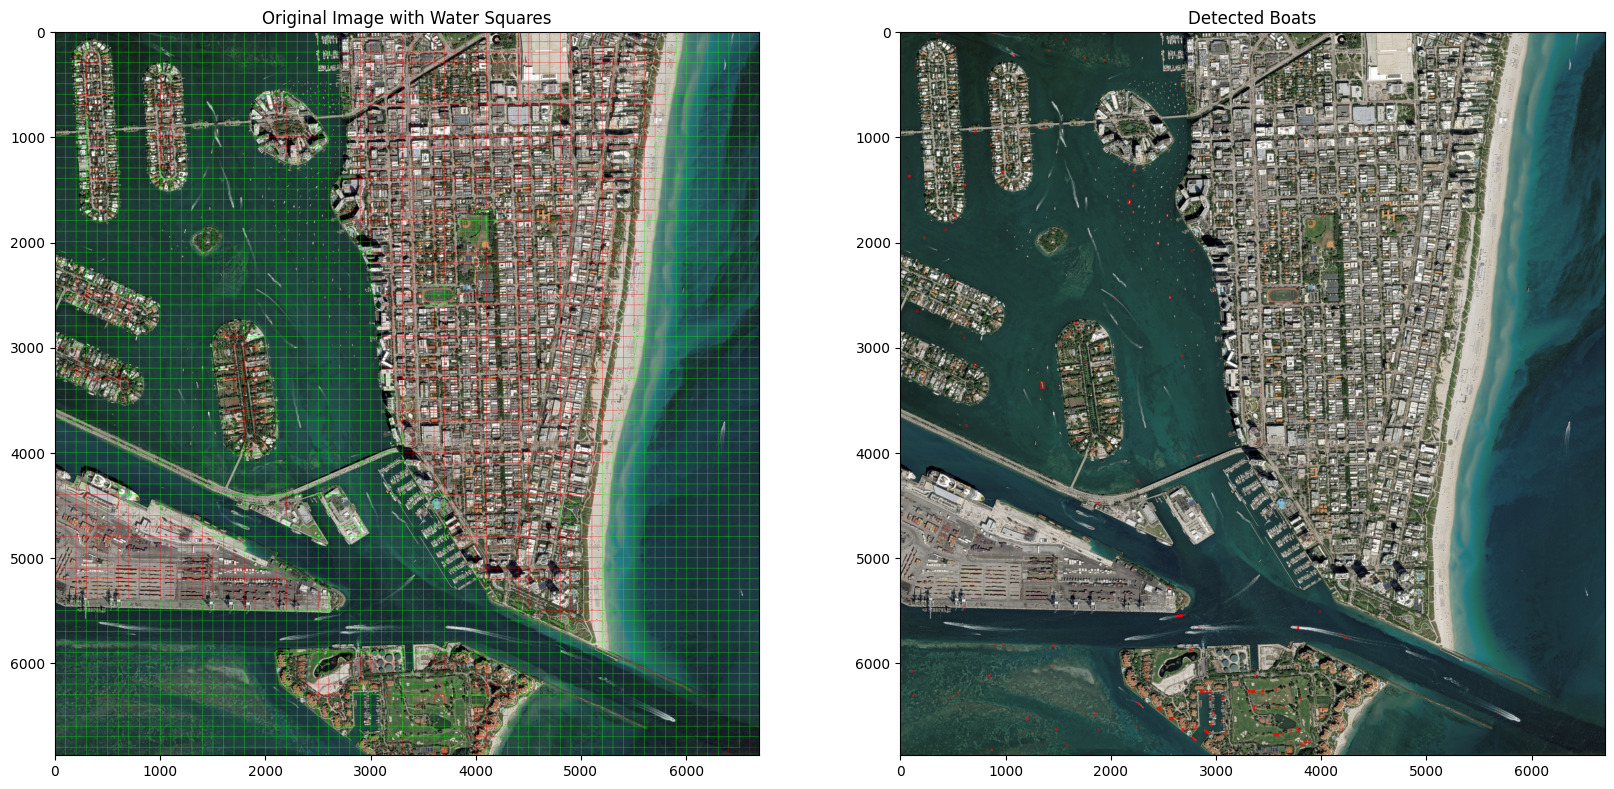

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import joblib

# Function to apply Gaussian filter
def apply_gaussian_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Function to load, resize and preprocess images
def load_and_preprocess_image(image_path, scale_percent, filter_type=False, kernel_size=5):
    image = cv2.imread(image_path)
    new_width = int(image.shape[1] * scale_percent / 100)
    new_height = int(image.shape[0] * scale_percent / 100)
    resized_image = cv2.resize(image, (new_width, new_height))
    
    if filter_type:
        resized_image = apply_gaussian_filter(resized_image, kernel_size)
        print("Filtered with Gaussian")
    
    return resized_image

# Function to draw grid lines on the image
def draw_grid_lines(image, square_size, line_thickness=2, color=(0, 0, 255)):
    img_height, img_width = image.shape[:2]
    grid_image = image.copy()
    
    # Draw horizontal lines
    for y in range(0, img_height, square_size):
        cv2.line(grid_image, (0, y), (img_width, y), color, line_thickness)
    
    # Draw vertical lines
    for x in range(0, img_width, square_size):
        cv2.line(grid_image, (x, 0), (x, img_height), color, line_thickness)
    
    return grid_image

# Function to rotate an image
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Load the original image with 100% scaling
original_image_path = "../satellite-images/Miami.jpg"
filter_true = True  # Apply Gaussian filter
scale_percent = 25  # Use 25% scaling for quicker processing
kernel_size = 5  # Kernel size for Gaussian filter
original_image_rescaled = load_and_preprocess_image(original_image_path, scale_percent, filter_true, kernel_size)

# Load the water mask from the .pkl file
water_mask_pkl_path = '../dilated_image_water_mask.pkl'
water_mask_binary = joblib.load(water_mask_pkl_path)

# Resize the water mask to match the original image dimensions
water_mask_image_rescaled = cv2.resize(water_mask_binary, (original_image_rescaled.shape[1], original_image_rescaled.shape[0]), interpolation=cv2.INTER_NEAREST)

# Verify dimensions
print(f"Original image dimensions: {original_image_rescaled.shape}")
print(f"Water mask dimensions: {water_mask_image_rescaled.shape}")

# Define square size
square_size = 100  # Example size, you can adjust it as needed

# Draw grid lines on the original image and water mask for visual segmentation
original_image_with_grid = draw_grid_lines(original_image_rescaled, square_size)
water_mask_with_grid = draw_grid_lines(water_mask_image_rescaled, square_size)

# Load template images
template_image_paths = [
    '../satellite-images/Miami_25percent_boat_template1.png',
    '../satellite-images/Miami_25percent_boat_template2.png',
    '../satellite-images/Miami_25percent_boat_template3.png',
    '../satellite-images/Miami_25percent_boat_template4.png',
    '../satellite-images/Miami_25percent_boat_template5.png'
]

# Define angles to rotate the templates
angles = list(range(0, 360, 45))  # More angles for finer detection

# Initialize a list to store the coordinates of detected boats
detected_boats = []

# Apply template matching and highlight matches
overlay_image = original_image_rescaled.copy()
for template_image_path in template_image_paths:
    template_image = cv2.imread(template_image_path, 0)
    for y in range(0, overlay_image.shape[0], square_size):
        for x in range(0, overlay_image.shape[1], square_size):
            water_segment = water_mask_image_rescaled[y:y+square_size, x:x+square_size]
            if np.any(water_segment == 1):  # Check if the segment contains water
                cv2.rectangle(original_image_with_grid, (x, y), (x + square_size, y + square_size), (0, 255, 0), 2)
                segment = original_image_rescaled[y:y+square_size, x:x+square_size]
                segment_gray = cv2.cvtColor(segment, cv2.COLOR_BGR2GRAY)
                segment_h, segment_w = segment_gray.shape
                for angle in angles:
                    rotated_template = rotate_image(template_image, angle)
                    template_h, template_w = rotated_template.shape
                    if template_w <= segment_w and template_h <= segment_h:
                        res = cv2.matchTemplate(segment_gray, rotated_template, cv2.TM_CCOEFF_NORMED)
                        threshold = 0.9  # Example threshold, adjust as needed
                        loc = np.where(res >= threshold)
                        for pt in zip(*loc[::-1]):
                            detected_boats.append((x + pt[0], y + pt[1], angle, template_image_path))
                            cv2.rectangle(overlay_image[y:y+square_size, x:x+square_size], (pt[0], pt[1]), (pt[0] + template_w, pt[1] + template_h), (0, 0, 255), 2)

# Save the images
# cv2.imwrite("../original_image_with_water_squares.png", original_image_with_grid)
# cv2.imwrite("../overlay_image_template_method.png", overlay_image)

# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image with Water Squares')
plt.imshow(cv2.cvtColor(original_image_with_grid, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Detected Boats')
plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))

plt.show()

In [10]:
# Print the coordinates and count of detected boats
print(f"Total detected boats: {len(detected_boats)}")
for boat in detected_boats:
    print(f"Coordinates: ({boat[0]}, {boat[1]}), Angle: {boat[2]}, Template: {boat[3]}")

Total detected boats: 1087
Coordinates: (350, 9), Angle: 90, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (351, 9), Angle: 90, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (352, 9), Angle: 90, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (353, 9), Angle: 90, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (339, 8), Angle: 270, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (340, 8), Angle: 270, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (341, 8), Angle: 270, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (346, 9), Angle: 270, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (347, 9), Angle: 270, Template: ../satellite-images/Miami_25percent_boat_template1.png
Coordinates: (348, 9), Angle: 270, Template: ../satellite-images/Miami_25perc